In [1]:
import pandas as pd
df=pd.read_csv('Wholesale.csv')
df.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844


In [2]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [3]:
df=df.drop(['Channel','Region'],axis=1)

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_df=sc.fit_transform(df)
sc_df=pd.DataFrame(sc_df,columns=df.columns)

In [6]:
from sklearn.cluster import KMeans

In [7]:
model=KMeans(n_clusters=3,random_state=0)

In [8]:
model.fit(sc_df)

c:\Users\yoshikoshi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\yoshikoshi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [9]:
model.labels_

array([2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 1,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2,

In [10]:
sc_df['cluster'] = model.labels_
sc_df.head(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,2
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0


In [11]:
sc_df.groupby('cluster').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,-0.507313,0.585563,0.809716,-0.324183,0.804182,0.083148
1,1.129319,3.805151,3.371239,1.573779,3.287741,2.198588
2,0.126563,-0.372418,-0.431222,0.043124,-0.425596,-0.126350


<Axes: xlabel='cluster'>

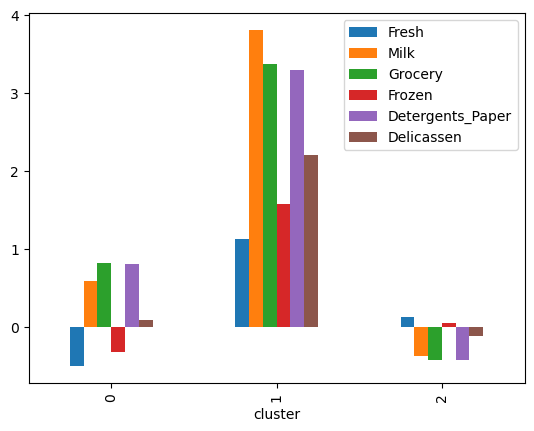

In [13]:
%matplotlib inline
cluster_mean=sc_df.groupby('cluster').mean()
cluster_mean.plot(kind='bar')

In [15]:
sse_list=[]

for n in range(2,31):
    model=KMeans(n_clusters=n,random_state=0)
    model.fit(sc_df)
    sse=model.inertia_
    sse_list.append(sse)

sse_list

c:\Users\yoshikoshi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\yoshikoshi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\yoshikoshi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\yoshikoshi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

[2043.7998084487574,
 1628.021437338512,
 1324.1455794934307,
 1066.518676666134,
 923.688368814249,
 833.8007189892957,
 750.0515288799982,
 669.7780011188453,
 619.9087831783497,
 573.2115000428759,
 531.0043836375461,
 504.86405287607437,
 481.4293564561862,
 445.672353607593,
 414.2430234107047,
 392.562799969632,
 378.05249022740327,
 357.2243120820111,
 338.47368167180986,
 318.9601587681701,
 316.60771669149904,
 295.2698432683848,
 283.21020437271943,
 270.95923986755014,
 258.2591159268844,
 246.0335166833365,
 237.25299428030422,
 227.2077010703434,
 224.91060395203246]

<Axes: >

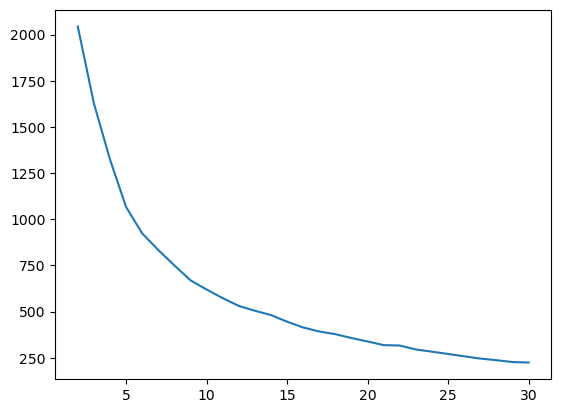

In [16]:
se=pd.Series(sse_list)
num=range(2,31)
se.index=num
se.plot(kind='line')

In [17]:
model=KMeans(n_clusters=5,random_state=0)
model.fit(sc_df)
sc_df['cluster']=model.labels_
sc_df.to_csv('clustered_Wholesale.csv',index=False)

c:\Users\yoshikoshi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\yoshikoshi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
